# **Importante nota antes de começar:** 
A análise inclui apenas a Série A do Campeonato Brasileiro por pontos corridos **(de 2006 a 2018)**

---
***Para fazer as médias para os gráficos só foram contabilizados os campeonatos com 38 rodadas.

**As únicas exceções são as duas ultimas estatísticas, e os dados dos mandantes/visitantes.


In [254]:
#importando biblioteca pandas
import pandas as pd

In [255]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
import matplotlib.pyplot as plt


In [257]:
#importando arquivo csv
df = pd.read_csv("/content/drive/MyDrive/Datasets/dados-brasileirao-2003-a-2018.csv", sep="	")

In [258]:
#Definindo o estilo de gráfico
plt.style.use("ggplot")

In [259]:
pontuacao = df.groupby("Clb")["Pts"].sum()

In [260]:
#Ultimo ano registrado
mandantes = df.loc[df["Home"] == True]
visitantes = df.loc[df["Home"] == False]

In [261]:
#Convertendo os dados em Boolean
df["Vit"] = df["Vit"].astype("boolean")
df["Emp"] = df["Emp"].astype("boolean")
df["Der"] = df["Der"].astype("boolean")

In [262]:
#cabeçalho dos dados
df.head()

,Ano,Rod,Pos,Clb,Pts,Vit,Emp,Der,GP,GC,SG,Adv,Home,Pts(ac),Vit(ac),Emp(ac),Der(ac),GP(ac),GC(ac),SG(ac)
0,2003,1,1,Athletico-PR,3,True,False,False,2,0,2,Gremio,True,3,1,0,0,2,0,2
1,2003,1,2,Atletico-MG,3,True,False,False,3,0,3,Corinthians,False,3,1,0,0,3,0,3
2,2003,1,5,Bahia,1,False,True,False,0,0,0,Fortaleza,False,1,0,1,0,0,0,0
3,2003,1,21,Corinthians,0,False,False,True,0,3,-3,Atletico-MG,True,0,0,0,1,0,3,-3
4,2003,1,6,Coritiba,1,False,True,False,1,1,0,Flamengo,False,1,0,1,0,1,1,0


In [263]:

ultima_Rodada = df.loc[df['Rod'] == 38]

In [264]:
campeao = ultima_Rodada.loc[ultima_Rodada["Pos"] == 1]
campeao_38_rod = campeao.loc[campeao["Ano"] >= 2006]



---

# O gráfico a baixo ilustra a pontuação com a qual cada campeão terminou o campeonato.

---



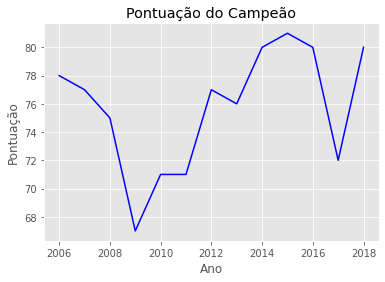

In [265]:
#Gráfico ilustrando a pontuação total de cada cam
campeao_38_rod.groupby("Ano")["Pts(ac)"].sum().plot(title="Pontuação do Campeão", c="b")
plt.xlabel("Ano")
plt.ylabel("Pontuação");



---


# **Pontuação de cada time campeão:**

In [266]:
campeao_38_rod.groupby(["Clb", "Ano"])["Pts(ac)"].sum()

Clb          Ano 
Corinthians  2011    71
             2015    81
             2017    72
Cruzeiro     2013    76
             2014    80
Flamengo     2009    67
Fluminense   2010    71
             2012    77
Palmeiras    2016    80
             2018    80
Sao-Paulo    2006    78
             2007    77
             2008    75
Name: Pts(ac), dtype: int64



---

**A pontuação média para ser campeãao é de aproximadamente 75 pontos**

---



In [279]:
#Média de pontos necessários para ser campeão
media_do_campeao = campeao_38_rod["Pts(ac)"].mean()
display(media_do_campeao)

75.76923076923077

In [277]:
#Média de gols dos campeões
campeao_38_rod["GP(ac)"].mean()

62.46153846153846



---
# **O campeão com menor pontuação terminou com 67 pontos conquistados.**

---




In [278]:
campeao_38_rod["Pts(ac)"].min()

67



---

# **O gráfico a seguir ilustra o total de gols marcados e sofridos pelo campeão ao fim do campeonato.**

---



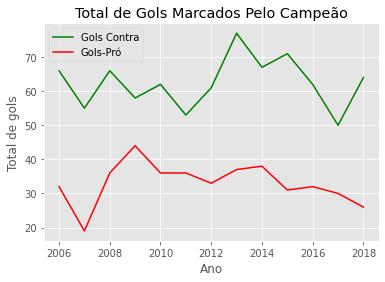

In [270]:
from matplotlib import colorbar
#Total de Gols marcados e sofridos pelo campeão do ano
campeao_38_rod.groupby("Ano")["GP(ac)"].sum().plot(title="Total de Gols Marcados Pelo Campeão", c="Green")
campeao_38_rod.groupby("Ano")["GC(ac)"].sum().plot(c="red")
plt.xlabel("Ano")
plt.ylabel("Total de gols")
plt.legend(["Gols Contra","Gols-Pró"]);

 ---
# **O gráfico a seguir ilustra a pontuação média conquistada pelo mandante e visitante por jogo a cada ano.**

---



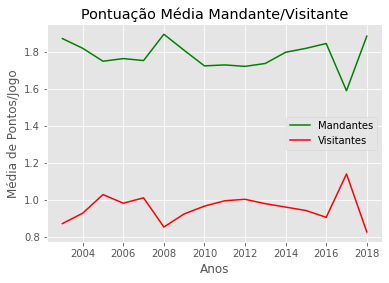

In [271]:
#Gráficos ilustrando a pontuação média do mandante e visitante por jogo
mandantes.groupby("Ano")["Pts"].mean().plot(title="Pontuação Média Mandante/Visitante", c="green")
visitantes.groupby("Ano")["Pts"].mean().plot(c="red")
plt.xlabel("Anos")
plt.ylabel("Média de Pontos/Jogo")
plt.legend(["Mandantes", "Visitantes"]);

# **O gráfico a seguir ilustra a média de gols marcados pelo mandante/visitante por jogo a cada ano**

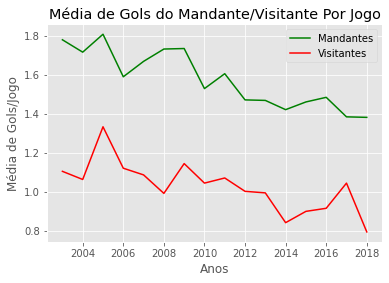

In [272]:
#Gráfico para ilustrar a Média de Gols do Mandante e Visitante
mandantes.groupby("Ano")["GP"].mean().plot(title="Média de Gols do Mandante/Visitante Por Jogo", c="green")
visitantes.groupby("Ano")["GP"].mean().plot(c="red")
plt.xlabel("Anos")
plt.ylabel("Média de Gols/Jogo")
plt.legend(["Mandantes", "Visitantes"]);



---


# **Total de gols marcados por cada campeão:**

In [273]:
campeao_38_rod.groupby(["Clb", "Ano"])["GP(ac)", "GC(ac)"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


GP(ac)  GC(ac)
Clb         Ano                 
Corinthians 2011      53      36
            2015      71      31
            2017      50      30
Cruzeiro    2013      77      37
            2014      67      38
Flamengo    2009      58      44
Fluminense  2010      62      36
            2012      61      33
Palmeiras   2016      62      32
            2018      64      26
Sao-Paulo   2006      66      32
            2007      55      19
            2008      66      36

In [274]:
anos = df.groupby("Ano")

# **O gráfico a seguir ilustra o total de gols marcados no campeonato por ano**

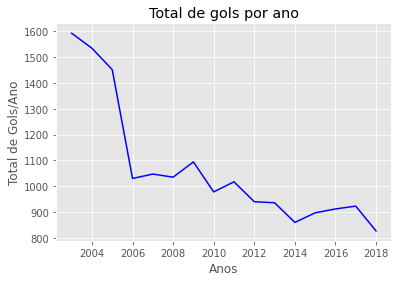

In [275]:
#Gráfico com o total de gols por ano
anos["GP"].sum().plot(title="Total de gols por ano", c="b")
plt.xlabel("Anos")
plt.ylabel("Total de Gols/Ano");
plt.savefig("Grafico_Total_Gols_Anos.png")

# **Essa seria a classificação de somássemos todos os pontos conquistados por cada clube desde 2003 até o ano de 2018**

In [276]:
#classificação com total de pontos conquistados por time
pontuacao.sort_values(ascending=False)

Clb
Sao-Paulo          1040
Cruzeiro            994
Santos              969
Corinthians         928
Flamengo            923
Internacional       916
Gremio              898
Fluminense          889
Atletico-MG         857
Athletico-PR        838
Palmeiras           828
Botafogo            744
Vasco               675
Coritiba            615
Goias               596
Figueirense         550
Vitoria             468
Ponte-Preta         433
Sport               420
Bahia               322
Parana              304
Juventude           263
Chapecoense         241
Sao-Caetano         236
Avai                216
Nautico             200
Criciuma            188
Atletico-GO         156
Paysandu            154
Guarani             147
Fortaleza           142
Portuguesa          131
Ceara               130
America-MG          105
Santa-Cruz           59
Barueri              49
Brasiliense          42
Santo-Andre          41
Ipatinga             35
Joinville            31
Gremio-Prudente      31
America-RN  